In [ ]:
library(scRNAseq)
library(scater)
library(scran)
library(Glimma)
library(edgeR)


Loading required package: limma


Attaching package: 'limma'


The following object is masked from 'package:scater':

    plotMDS


The following object is masked from 'package:BiocGenerics':

    plotMA



Attaching package: 'edgeR'


The following object is masked from 'package:SingleCellExperiment':

    cpm




In [19]:
  library(MAST)
  library(data.table)


Attaching package: 'data.table'


The following object is masked from 'package:SummarizedExperiment':

    shift


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second




In [32]:
library(Seurat)
library(MAST)
library(dplyr)
library(data.table)
library(ggplot2)


Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'sp'


The following object is masked from 'package:IRanges':

    %over%


'SeuratObject' was built under R 4.2.3 but the current version is
4.4.3; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.6.5 but the current
version is 1.7.3; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following object is masked from 'package:SummarizedExperiment':

    Assays


The following object is masked from 'package:GenomicRanges':

    intersect


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following object is masked from 'package:IRanges':

    intersect


The following object is masked from 'package:S4Vectors':

    intersect


The following object is masked from 'package:BiocGenerics':

    intersect


In [11]:
setwd("/data2st1/sch_backup/data_from_huangyin_128samples/Neuron/data_for_R/HIP")


In [12]:
seo = readRDS("HIP_final_v2.rds")

In [24]:
# scale the nFeature_RNA to 0-1
seo$nFeature_RNAS = (seo$nFeature_RNA - min(seo$nFeature_RNA)) / (max(seo$nFeature_RNA) - min(seo$nFeature_RNA))
# scale the nCount_RNA
seo$nCount_RNAS = (seo$nCount_RNA - min(seo$nCount_RNA)) / (max(seo$nCount_RNA) - min(seo$nCount_RNA))


cell_groups <- unique(seo@meta.data[['celltype.L2']])

In [ ]:
seo@meta.data$seurat_clusters

,orig.ident,nCount_RNA,nFeature_RNA,_index,batch,region,tech,donor,sex,status,⋯,RNA_snn_res.0.85,RNA_snn_res.0.9,RNA_snn_res.0.95,RNA_snn_res.1,RNA_snn_res.1.05,company,umap_seurat_1,umap_seurat_2,nFeature_RNAS,nCount_RNAS
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAATAACC-1HIP_yunzhun_MW45A,SeuratProject,8228,3167,AAACCCAAGAATAACC-1HIP_yunzhun_MW45A,HIP_yunzhun_MW45A,HPF,10X,MW45A,M,W,⋯,5,7,3,3,6,yunzhun,8.1328366,3.604376,0.25010679,0.079012578
AAACCCAAGAGCCGAT-1HIP_yunzhun_MW45A,SeuratProject,2464,1417,AAACCCAAGAGCCGAT-1HIP_yunzhun_MW45A,HIP_yunzhun_MW45A,HPF,10X,MW45A,M,W,⋯,0,0,0,0,0,yunzhun,-6.3538334,1.933130,0.06322085,0.011321065
AAACCCAAGGAATCGC-1HIP_yunzhun_MW45A,SeuratProject,11738,3867,AAACCCAAGGAATCGC-1HIP_yunzhun_MW45A,HIP_yunzhun_MW45A,HPF,10X,MW45A,M,W,⋯,9,8,9,9,10,yunzhun,9.5776294,-6.322797,0.32486117,0.120233468
AAACCCAAGGATACCG-1HIP_yunzhun_MW45A,SeuratProject,7882,2963,AAACCCAAGGATACCG-1HIP_yunzhun_MW45A,HIP_yunzhun_MW45A,HPF,10X,MW45A,M,W,⋯,14,16,16,14,16,yunzhun,-0.6099243,15.517522,0.22832123,0.074949208
AAACCCACACAGTATC-1HIP_yunzhun_MW45A,SeuratProject,2285,1296,AAACCCACACAGTATC-1HIP_yunzhun_MW45A,HIP_yunzhun_MW45A,HPF,10X,MW45A,M,W,⋯,0,0,0,0,0,yunzhun,-6.2907493,1.541630,0.05029902,0.009218917
AAACCCACATACATCG-1HIP_yunzhun_MW45A,SeuratProject,5114,2329,AAACCCACATACATCG-1HIP_yunzhun_MW45A,HIP_yunzhun_MW45A,HPF,10X,MW45A,M,W,⋯,1,1,2,2,1,yunzhun,-6.3576538,-3.634570,0.16061512,0.042442250


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



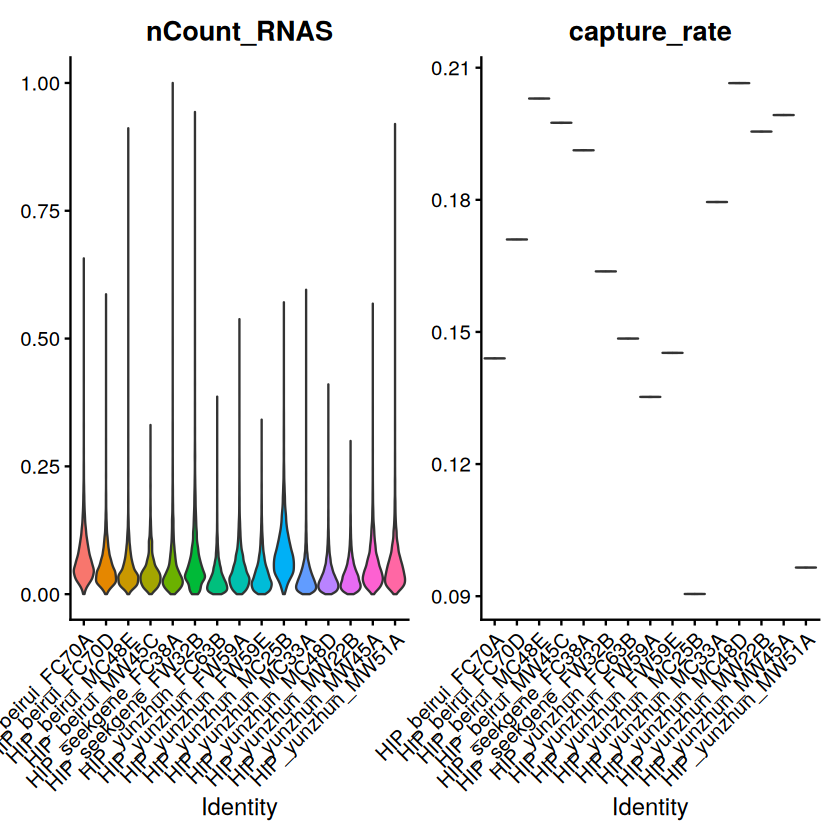

In [43]:
# the first two cell groups
VlnPlot(seo, features = c("nCount_RNAS",'capture_rate'),group.by = 'batch',pt.size = 0)

In [49]:
region = "HPF"

perform_mast_analysis <- function(seurat_obj,
                                  group.by, 
                                  compare.by,
                                  group1, 
                                  group2, 
                                  batch.by,
                                  freq_expressed = 0.1,
                                  save.as.tmp = FALSE) {


  
  expr_matrix <- GetAssayData(seurat_obj, layer = "data")
      
  filter_genes <- !grepl("^Rp", rownames(expr_matrix)) & !grepl("^mt-", rownames(expr_matrix))
  expr_matrix <- expr_matrix[filter_genes, ]
    
  metadata <- seurat_obj@meta.data
  #cell_groups <- unique(metadata[[group.by]])
  cell_groups <- c('HPF DG GC Glut')
  
  all_results <- data.frame()
  
  for (cell_group in cell_groups) {
    tryCatch({
      cat("====================================\n")
      cat("Analyzing cell group:", cell_group, "\n")
      
      cells_in_group <- rownames(metadata[metadata[[group.by]] == cell_group, ])
      cells_group1 <- cells_in_group[metadata[cells_in_group, compare.by] == group1]
      cells_group2 <- cells_in_group[metadata[cells_in_group, compare.by] == group2]
      
      if(length(cells_group1) == 0 || length(cells_group2) == 0) {
        cat("  Skipped: one of the treatment groups has zero cells\n")
        next
      }
      
      selected_cells <- c(cells_group1, cells_group2)
      dat.tmp <- expr_matrix[, selected_cells]
      anno.tmp <- metadata[selected_cells, ]
      
      # 打印batch和treatment分布表
      batch_treatment_table <- table(anno.tmp[[batch.by]], anno.tmp[[compare.by]])
      cat("  Batch x Treatment distribution:\n")
      print(batch_treatment_table)
      
      # 判断每个batch是否包含两个treatment组
      batches_all_have_both_treatments <- all(rowSums(batch_treatment_table > 0) == ncol(batch_treatment_table))
      
      # 是否有多个batch
      multiple_batches_exist <- nrow(batch_treatment_table) > 1
      
      # 根据分布决定是否用batch效应
      if (multiple_batches_exist && batches_all_have_both_treatments) {
        use_batch_effect <- TRUE
        cat("  Will use batch effect in model\n")
      } else {
        use_batch_effect <- FALSE
        if(!multiple_batches_exist) {
          cat("  Only one batch found - batch effect not used\n")
        } else if (!batches_all_have_both_treatments) {
          cat("  Not all batches contain both treatments - batch effect not used\n")
        }
      }
      
      # 创建MAST对象
      sca <- FromMatrix(as.matrix(dat.tmp), cData = anno.tmp)
      
      # 基因表达频率过滤
      select.genes <- freq(sca) > freq_expressed
      sca <- sca[select.genes, ]

      set.seed(123)
      # Downsample cells to 2000
      cells_to_keep <- sample(colnames(sca), size = 2000, replace = FALSE)
      sca <- sca[, cells_to_keep]

      
      # 设定compare_group factor
      colData(sca)$compare_group <- factor(colData(sca)[[compare.by]], levels = c(group1, group2))
      
      if (use_batch_effect) {
        colData(sca)$batch <- factor(colData(sca)[[batch.by]])
        colData(sca)$nFeature_RNAS <- colData(sca)$nFeature_RNAS
        colData(sca)$nCount_RNAS <- colData(sca)$nCount_RNAS
        colData(sca)$capture_rate <- colData(sca)$capture_rate

        zlm_model <- zlm(~ compare_group + batch, sca)
      } else {
        zlm_model <- zlm(~ compare_group, sca)
      }
      
      # 差异分析
      contrast_name <- paste0("compare_group", group2)
      summary_result <- summary(zlm_model, doLRT = contrast_name)
      summaryDt <- summary_result$datatable
      
      fcHurdle <- merge(
        summaryDt[contrast == contrast_name & component == 'H', .(primerid, `Pr(>Chisq)`)],
        summaryDt[contrast == contrast_name & component == 'logFC', .(primerid, coef, ci.hi, ci.lo)],
        by = 'primerid'
      )
      if(nrow(fcHurdle) == 0){
        cat("  Warning: no genes passed filtering\n")
        next
      }
      
      fcHurdle[, padjust := p.adjust(`Pr(>Chisq)`, 'bonferroni')]
      fcHurdle[[group.by]] <- cell_group
      
      all_results <- rbind(all_results, fcHurdle)
      
      if(save.as.tmp){
        save(fcHurdle, file = paste0("tmp.degene.result.", make.names(cell_group), ".rda"))
      }
    }, error = function(e){
      cat("  Error in cell group ", cell_group, " : ", e$message, "\n")
    })
  }
  
  if (nrow(all_results) == 0) {
    warning("No differential expression results were generated.")
  }
  
  return(all_results)
}

#Split
seo_M = subset(seo, sex=="M")
seo_F = subset(seo, sex=="F")

# MAST
r.deg_M <- perform_mast_analysis(seo_M,
                               group.by = "celltype.L2",
                               compare.by = "treatment",
                               group1 = "control",
                               group2 = "depression",
                               batch.by = "company")





colnames(r.deg_M) = c("gene","Pr","avg_log2FC","ci.hi","ci.lo","p_val_adj","celltype")

r.deg_M$region = region

# Save results
outdir <- "/data2st1/junyi/output/atac0526/dar/region_nt/mast/test"

write.csv(r.deg_M, file.path(outdir, "MAST_DEG_M.csv"))
#write.csv(r.deg_M,"MAST_DEG_M.csv")

filtered_r.deg_M = r.deg_M %>%
  filter(p_val_adj < 0.05&abs(avg_log2FC)>0.1)

write.csv(filtered_r.deg_M, file.path(outdir, "MAST_DEG_M_filtered_ds.csv"))
#write.csv(filtered_r.deg_M,"MAST_DEG_M_filtered.csv")


r.deg_F <- perform_mast_analysis(seo_F,
                               group.by = "celltype.L2",
                               compare.by = "treatment",
                               group1 = "control",
                               group2 = "depression",
                               batch.by = "company")


colnames(r.deg_F) = c("gene","Pr","avg_log2FC","ci.hi","ci.lo","p_val_adj","celltype")

r.deg_F$region = region

write.csv(r.deg_F, file.path(outdir, "MAST_DEG_F.csv"))
#write.csv(r.deg_F,"MAST_DEG_F.csv")


filtered_r.deg_F = r.deg_F %>%
  filter(p_val_adj < 0.05&abs(avg_log2FC)>0.1)

# Save results
write.csv(filtered_r.deg_F, file.path(outdir, "MAST_DEG_F_filtered_ds.csv"))
#write.csv(filtered_r.deg_F,"MAST_DEG_F_filtered.csv")


Analyzing cell group: HPF DG GC Glut 
  Batch x Treatment distribution:
         
          control depression
  beirui     1809       2797
  yunzhun   14355      12905
  Will use batch effect in model


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 7.6 GiB"
`cData` has no wellKey.  I'll make something up.

Assuming data assay in position 1, with name et is log-transformed.


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



Analyzing cell group: HPF DG GC Glut 
  Batch x Treatment distribution:
          
           control depression
  beirui         0       4198
  seekgene    2430       3148
  yunzhun     7201       3085
  Not all batches contain both treatments - batch effect not used


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 4.8 GiB"
`cData` has no wellKey.  I'll make something up.

Assuming data assay in position 1, with name et is log-transformed.


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

